<a href="https://colab.research.google.com/github/shatakshi-1404/Hotel-Sentiment-Analysis/blob/main/Hotel_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
  0% 0.00/5.14M [00:00<?, ?B/s]
100% 5.14M/5.14M [00:00<00:00, 750MB/s]
Archive:  trip-advisor-hotel-reviews.zip
  inflating: tripadvisor_hotel_reviews.csv  
Dataset loaded with 20491 reviews
                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


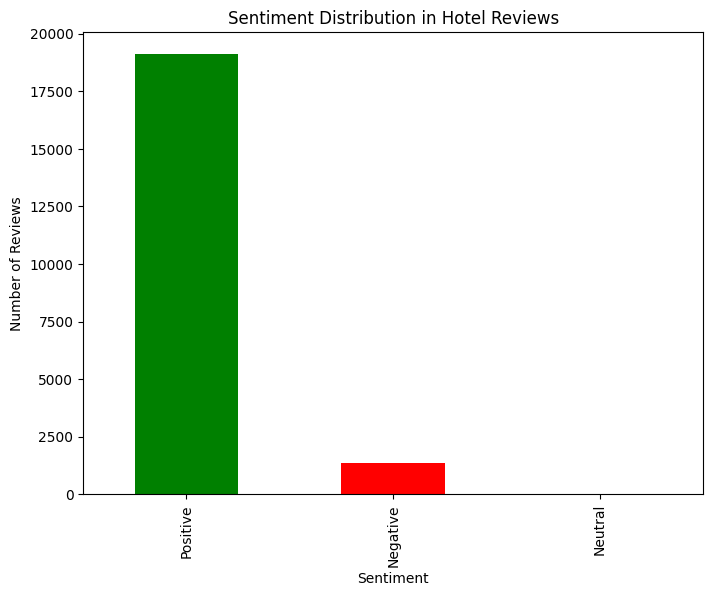

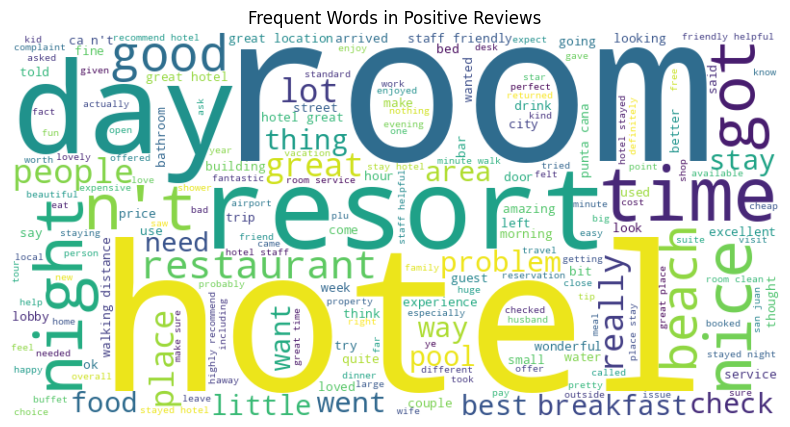

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Analysis complete! Downloaded 'analyzed_reviews.csv'


In [ ]:


!pip install -q kaggle
from google.colab import files


uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d andrewmvd/trip-advisor-hotel-reviews
!unzip trip-advisor-hotel-reviews.zip

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

df = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(f"Dataset loaded with {len(df)} reviews")
print(df.head())


def get_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


df['Sentiment'] = df['Review'].apply(get_sentiment)

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Hotel Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequent Words in Positive Reviews')
plt.show()

df.to_csv('analyzed_reviews.csv', index=False)
files.download('analyzed_reviews.csv')

print("Analysis complete! Downloaded 'analyzed_reviews.csv'")

In [4]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity


    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'


test_reviews = [
    "This hotel was amazing! The staff were so helpful.",  # Positive
    "Terrible experience. The room was dirty and noisy.",  # Negative
    "It was okay, nothing special.",                      # Neutral
    "The food was good, but the service was slow.",       # Neutral
    "Meh.",                                               # Neutral
    "The room was clean.",                                # Neutral
]

print("----- Improved Sentiment Test Results -----")
for review in test_reviews:
    print(f"Review: {review}")
    print(f"Sentiment: {get_sentiment(review)}\n")

----- Improved Sentiment Test Results -----
Review: This hotel was amazing! The staff were so helpful.
Sentiment: Positive

Review: Terrible experience. The room was dirty and noisy.
Sentiment: Negative

Review: It was okay, nothing special.
Sentiment: Positive

Review: The food was good, but the service was slow.
Sentiment: Neutral

Review: Meh.
Sentiment: Neutral

Review: The room was clean.
Sentiment: Positive



In [7]:
# In your Colab notebook, add these lines before downloading:
df.to_csv('analyzed_reviews.csv', index=False)  # Save CSV
plt.savefig('sentiment_plot.png')  # Save plot

NameError: name 'df' is not defined